### Observations
- There was an even number of males and females in the study. 
- Capomulin was the drug that had the smalles final tumor volume while Ceftamin seemed to have the     largest tumor volume.
- 

In [1]:
## Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
## Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

## Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
## merge the data
master_df = mouse_metadata.merge(study_results, on='Mouse ID')

In [6]:
master_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
master_df = master_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [8]:
master_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
master_df.duplicated(subset=['mouse_id', 'timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [10]:
# Checking the number of mice.
dup_mouse = master_df.loc[master_df.duplicated(subset=['mouse_id', 'timepoint']), 'mouse_id'].unique()
dup_mouse

array(['g989'], dtype=object)

In [11]:
clean_df = master_df[master_df['mouse_id'].isin(dup_mouse) == False]

In [12]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [13]:
##clean_df.groupby('drug_regimen')['tumor_volume_(mm3)'].mean()

In [14]:
means = clean_df.groupby('drug_regimen').mean()['tumor_volume_(mm3)']
medians = clean_df.groupby('drug_regimen').median()['tumor_volume_(mm3)']
variance = clean_df.groupby('drug_regimen').var()['tumor_volume_(mm3)']
std_dev = clean_df.groupby('drug_regimen').std()['tumor_volume_(mm3)']
std_err = clean_df.groupby('drug_regimen').sem()['tumor_volume_(mm3)']

In [15]:
summary_table = pd.DataFrame({
    'mean_tumor_volume': means,
    'median_tumor_volume': medians,
    'tumor_volume_variance': variance,
    'tumor_volume_std_dev': std_dev,
    'tumor_volume_std_err': std_err
})
summary_table 

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_std_dev,tumor_volume_std_err
drug_regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
##clean_df.groupby('drug_regimen').agg({
##    'tumor_volume_(mm3)': ['mean', 'median', 'var', 'std', 'sem']
##})

## Bar and Pie Charts

In [17]:
clean_df.columns

Index(['mouse_id', 'drug_regimen', 'sex', 'age_months', 'weight_(g)',
       'timepoint', 'tumor_volume_(mm3)', 'metastatic_sites'],
      dtype='object')

### DataFrame Plot

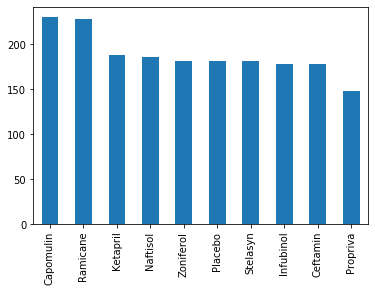

In [18]:
clean_df['drug_regimen'].value_counts().plot(kind='bar')

### Matplotlib Plot

<BarContainer object of 10 artists>

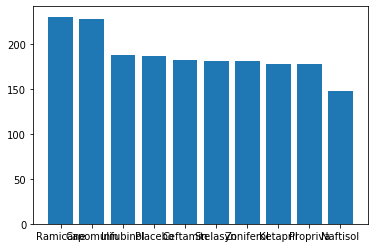

In [19]:
plt.bar(x=clean_df['drug_regimen'].unique(),
       height=clean_df['drug_regimen'].value_counts().values)

In [20]:
##clean_df['drug_regimen'].value_counts().values

In [21]:
##clean_df['drug_regimen'].unique(),
        

### Pie Plot

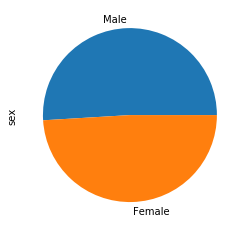

In [22]:
gender_count = clean_df['sex'].value_counts()
gender_count.plot(kind='pie')

In [23]:
gender_count

Male      958
Female    922
Name: sex, dtype: int64

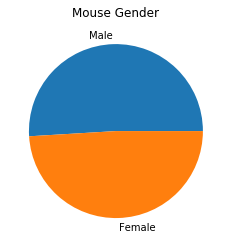

In [24]:
plt.pie(x= gender_count.values, labels = gender_count.index)
plt.title('Mouse Gender')
plt.show()

### Quartiles, Outliers and Boxplots

In [25]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
max_df = clean_df.groupby("mouse_id")["timepoint"].max().reset_index()

In [27]:
max_df

,mouse_id,timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [28]:
max_merge = clean_df.merge(max_df, on=['mouse_id', 'timepoint'])

In [29]:
max_merge.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [30]:
capomulin_df = max_merge.loc[max_merge["drug_regimen"]  == 'Capomulin']
ramicane_df = max_merge.loc[max_merge["drug_regimen"]  == 'Ramicane']
infubinol_df = max_merge.loc[max_merge["drug_regimen"]  == 'Infubinol']
ceftamin_df = max_merge.loc[max_merge["drug_regimen"]  == 'Ceftamin']

In [50]:
capomulin_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
6,f966,Capomulin,Male,16,17,20,30.485985,0
10,u364,Capomulin,Male,18,17,45,31.023923,3
12,y793,Capomulin,Male,17,17,45,31.896238,2
13,r554,Capomulin,Female,8,17,45,32.377357,3
14,m957,Capomulin,Female,3,19,45,33.329098,1
16,t565,Capomulin,Female,20,17,45,34.455298,0
20,i738,Capomulin,Female,23,20,45,37.311846,2


In [49]:
ceftamin_df

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
52,a275,Ceftamin,Female,20,28,45,62.999356,3
65,b447,Ceftamin,Male,2,30,0,45.000000,0
66,b487,Ceftamin,Female,6,28,25,56.057749,1
68,b759,Ceftamin,Female,12,25,30,55.742829,1
97,f436,Ceftamin,Female,3,25,15,48.722078,2
110,h531,Ceftamin,Male,5,27,5,47.784682,0
117,j296,Ceftamin,Female,24,30,45,61.849023,3
121,k210,Ceftamin,Male,15,28,45,68.923185,3
132,l471,Ceftamin,Female,7,28,45,67.748662,1
133,l490,Ceftamin,Male,24,26,30,57.918381,3


In [32]:
cap_vol = capomulin_df["tumor_volume_(mm3)"]
ram_vol = ramicane_df["tumor_volume_(mm3)"]
inf_vol = infubinol_df["tumor_volume_(mm3)"]
cef_vol = ceftamin_df["tumor_volume_(mm3)"]

In [42]:
final_tumor_vol = max_merge['tumor_volume_(mm3)']

In [43]:
quartiles = final_tumor_vol.quantile([.25, .50, .75])
quartiles

0.25    45.875867
0.50    55.793278
0.75    65.053624
Name: tumor_volume_(mm3), dtype: float64

In [46]:
lowerq = quartiles[0.25]
higherq = quartiles[0.75]
iqr = higherq - lowerq


print(f'Lower Quartile of final_tumor_vol: {lowerq}')
print(f'Upper Quartile of final_tumor_vol: {higherq}')
print(f'Inner Quartile Range is: {iqr}')
print(f'The Median of final_tumor_vol is {quartiles[0.5]}')


Lower Quartile of final_tumor_vol: 45.87586684749999
Upper Quartile of final_tumor_vol: 65.05362410500001
Inner Quartile Range is: 19.17775725750002
The Median of final_tumor_vol is 55.793278175


In [48]:
lower_bound = lowerq - (1.5 * iqr)
upper_bound = higherq + (1.5 * iqr)

print(f'Values below {lower_bound} could be outliers, and values above {upper_bound} could also be outliers!')

Values below 17.109230961249963 could be outliers, and values above 93.82025999125004 could also be outliers!


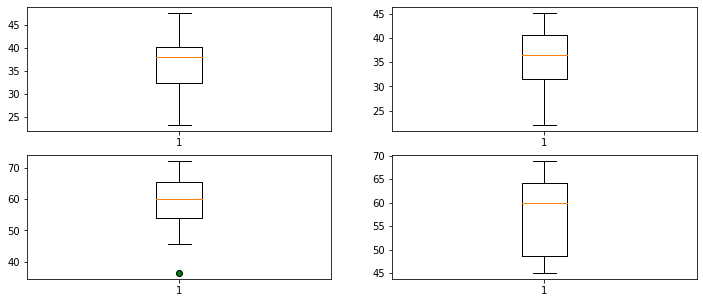

In [33]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,5))
green_circle = dict(markerfacecolor='g')
ax1.boxplot(cap_vol)
ax2.boxplot(ram_vol)
ax3.boxplot(inf_vol, flierprops=green_circle)
ax4.boxplot(cef_vol)
plt.show()

### Line plot - Select a mouse that was treated with Capomulin and generate a line plot of time point versus tumor volume for that mouse

In [52]:
clean_df.head()

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
## mouse 
Cap = clean_df.loc[clean_df["drug_regimen"]  == 'Capomulin']
Cap

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [57]:
mouse_no = Cap.loc[Cap["mouse_id"]  == 's185']
mouse_no

,mouse_id,drug_regimen,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [58]:
time_point = mouse_no['timepoint']
time_point

10     0
11     5
12    10
13    15
14    20
15    25
16    30
17    35
18    40
19    45
Name: timepoint, dtype: int64

In [59]:
tumor_vol = mouse_no['tumor_volume_(mm3)']
tumor_vol

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: tumor_volume_(mm3), dtype: float64

### Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen

In [35]:
avg_tumor_volume = capomulin_df.groupby("mouse_id")["tumor_volume_(mm3)"].mean().to_frame()

In [36]:
avg_tumor_volume.head()

,tumor_volume_(mm3)
mouse_id,
b128,38.982878
b742,38.939633
f966,30.485985
g288,37.074024
g316,40.159220


In [60]:
#mouse_weight = capomulin_df.iloc[:,4]
#avg_tumor_vol = avg_tumor_volume.iloc[:,0]
#plt.scatter(mouse_weight, avg_tumor_vol)
##plt.xticks(mouse_weight, rotation=90)
#plt.xlabel('Mouse Weight')
#plt.ylabel('Average Tumor Volume')
#plt.show()

In [38]:
##cap_weight = capomulin_df.groupby("mouse_id")["weight_(g)"].unique()

In [39]:
##cap_weight = cap_weight.to_frame()

In [40]:
##cap_weight.head()

In [41]:
##capomulin_df.groupby("mouse_id")["tumor_volume_(mm3)"].mean()

### Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment